# Pregunta 8
### Nombre: Jairo Angulo

Dados los puntos (−1,1),(0,5),(1,3)
, se ha obtenido los splines cúbicos correspondientes. 
Sin embargo, al observar la figura, usted no se siente satisfecho con la pendiente resultante en el punto (x1,y1)
. Y decide intentar una modificación a las ecuaciones, tal que los splines sean tangentes a una pendiente deseada m
 en el punto (x1,y1)
.

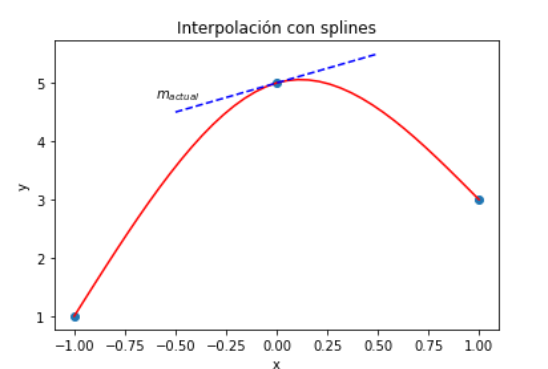


Recuerde que la expresión de un spline cúbico es la siguiente:
 Si(x)=ai+bi(x−xi)+ci(x−xi)2+di(x−xi)3




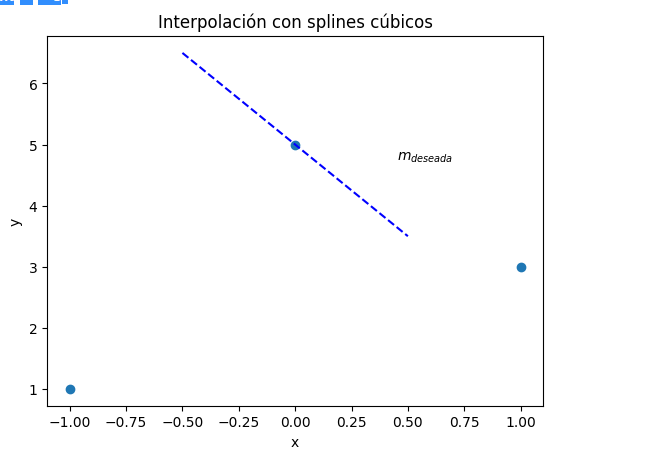



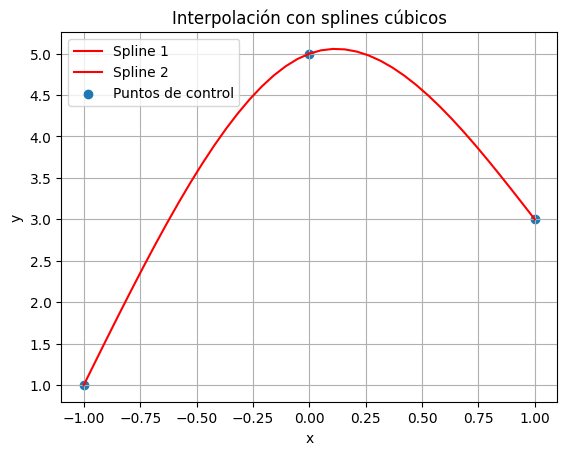

In [12]:

import matplotlib.pyplot as plt
import numpy as np

def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Spline 1", "Spline 2", "Puntos de control"])
plt.grid()
plt.title("Interpolación con splines cúbicos")
plt.show()



## m = -3 en (x1,y1)

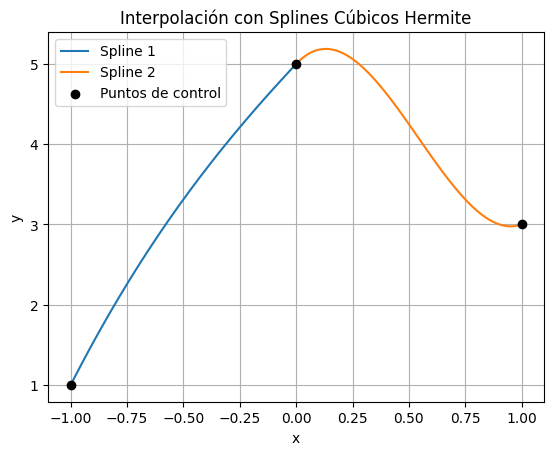

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_coeficientes(x0, x1, y0, y1, m0, m1):
    """Calcula los coeficientes de un spline cúbico Hermite entre dos puntos."""
    h = x1 - x0
    a = y0
    b = m0
    c = (3 * (y1 - y0) / h**2) - (2 * m0 + m1) / h
    d = (2 * (y0 - y1) / h**3) + (m0 + m1) / h**2
    return {"a": a, "b": b, "c": c, "d": d}

def spline(x, x0, coef):
    """Evalúa el spline cúbico dado un x, un punto base x0, y coeficientes."""
    dx = x - x0
    return coef["a"] + coef["b"] * dx + coef["c"] * dx**2 + coef["d"] * dx**3

xs = [-1, 0, 1]
ys = [1, 5, 3]

m_1 = 3  

spline1 = calcular_coeficientes(xs[0], xs[1], ys[0], ys[1], m_0, m_1)
spline2 = calcular_coeficientes(xs[1], xs[2], ys[1], ys[2], m_1, m_2)

for i, (x_i, x_f, coef) in enumerate(zip(xs[:-1], xs[1:], [spline1, spline2])):
    _x = np.linspace(x_i, x_f, 100)
    _y = spline(_x, x_i, coef)
    plt.plot(_x, _y, label=f"Spline {i+1}")

plt.scatter(xs, ys, color='black', zorder=5, label="Puntos de control")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con Splines Cúbicos Hermite")
plt.grid()
plt.legend()
plt.show()

def formatear_ecuacion(coef, x0, i):
    a, b, c, d = coef["a"], coef["b"], coef["c"], coef["d"]
    

formatear_ecuacion(spline1, xs[0], 1)
formatear_ecuacion(spline2, xs[1], 2)



